## Proyek Analisis Data: Bike-sharing-dataset
- Nama: Heru Suwito
- Email: herusuwito354354@gmail.com
- ID Dicoding: HERU SUWITO

## Menentukan Pertanyaan Bisnis
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda ?
- Pada jam berapa penyewaan sepeda mencapai puncaknya dalam sehari ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## Mengambil file zip dan melihat isi didalam zip

In [6]:
zip_path = "Bike-sharing-dataset.zip" 
extract_path = "data_set" 

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['day.csv', 'hour.csv', 'Readme.txt']

In [9]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Isi ZIP:", zip_ref.namelist())

Isi ZIP: ['Readme.txt', 'day.csv', 'hour.csv']


# Data Wrangling 

## Gathering data

In [10]:
day_df = pd.read_csv("data_set/day.csv")
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [11]:
hour_df = pd.read_csv("data_set/hour.csv")
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Insight dari Gathering data
- memuat tabel day_df dan hour_df
- mengumpulkan data yang di butuh kan untuk menjawab 2 pertanyaan yang ada di atas

## Assessing Data

In [16]:
# Menilai Data day_df

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  check       731 non-null    int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.0
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.0
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.0
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.0
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.0
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.0


In [17]:
# Menilai data hour_df

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Insight dari assessing data
- pada day_df tidak ditemuka missing value
- pada day_df bagian dteday perlu di ubah format menggunakan datetime
- pada day_df data duplikasi 0
- pada hour_df tidak ditemuka missing value
- pada hour_df bagian dteday perlu di ubah format menggunakan datetime
- pada hour_df data duplikasi 0


## Cleaning data

In [29]:
# ubah format dteday di day_df dari object ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [31]:
print(day_df.dtypes)


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
check                  int64
dtype: object


In [28]:
# ubah format dteday di hour_df ke format datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [30]:
print(hour_df.dtypes)


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### Insight dari cleaning data
- berhasi mengubah format dteday dari object ke datetime di day_df
- berhasil mengubah format dteday dari objet ke datetime di hour_df

# Exploratory Data Analysis (EDA)

In [42]:
# mengelompokan data berdasarkan weathersit serta menghitung rata-rata penyewa sepeda cnt, casual, registered
weather_table = hour_df.groupby('weathersit')[['cnt', 'casual', 'registered']].mean()
print(weather_table)

                   cnt     casual  registered
weathersit                                   
1           204.869272  40.545431  164.323841
2           175.165493  29.595290  145.570202
3           111.579281  16.055673   95.523608
4            74.333333   2.666667   71.666667


In [43]:
# mengelompokkan data berdasarkan hr (jam) serta menghitung total penyewaan sepeda cnt, casual, dan (registered).
hourly_table = hour_df.groupby('hr')[['cnt', 'casual', 'registered']].sum()
print(hourly_table)

       cnt  casual  registered
hr                            
0    39130    7375       31755
1    24164    4709       19455
2    16352    3412       12940
3     8174    1893        6281
4     4428     874        3554
5    14261    1012       13249
6    55132    3017       52115
7   154171    8037      146134
8   261001   15761      245240
9   159438   22458      136980
10  126257   33789       92468
11  151320   43286      108034
12  184414   49718      134696
13  184919   52713      132206
14  175652   55089      120563
15  183149   54606      128543
16  227748   53834      173914
17  336860   54220      282640
18  309772   44496      265276
19  226789   35505      191284
20  164550   26378      138172
21  125445   20570      104875
22   95612   16200       79412
23   63941   11065       52876


In [44]:
# mengurutkan jam penyewaan terbanyak
hourly_sorted = hourly_table.sort_values(by="cnt", ascending=False)
print(hourly_sorted)

       cnt  casual  registered
hr                            
17  336860   54220      282640
18  309772   44496      265276
8   261001   15761      245240
16  227748   53834      173914
19  226789   35505      191284
13  184919   52713      132206
12  184414   49718      134696
15  183149   54606      128543
14  175652   55089      120563
20  164550   26378      138172
9   159438   22458      136980
7   154171    8037      146134
11  151320   43286      108034
10  126257   33789       92468
21  125445   20570      104875
22   95612   16200       79412
23   63941   11065       52876
6    55132    3017       52115
0    39130    7375       31755
1    24164    4709       19455
2    16352    3412       12940
5    14261    1012       13249
3     8174    1893        6281
4     4428     874        3554


### insight dari Exploratory Data Analysis (EDA)
- Dilihat dari table weather_table penyewaan tertinggi pada saat cuaca cerah (weatershit = 1) yaitu rata-rata 204 sepeda
- dilihat dari table weather_table keadaan cuaca mempengaruhi penurunan penyewaan sepeda cnt sampai ke angka rendah yaitu 74 orang 
- dari table weather_table Saat hujan deras, jumlah penyewa kasual turun drastis ke hanya sekitar 2 orang per jam.
- untuk penyewa register pada weather_table terjadi penurun walaupun masih banyak yang register sekitar 71 orang

- pada table hourly_table puncak tertinggi penyewaan sepeda terjadi pada jam 17 yaitu 336860
- pada table hourly_table pengguna casual juga aktif di sore hari jam 17 yaitu 54220
- pada table hourly_table registrasi juga mendominasi pada jam sibuk pada jam 17 yaitu 282640
- pada table hourly_table terjadi penurunan pelanggan dari jam 0 - 5

# Visualization & Explanatory Analysis

## Pertanyaan 1

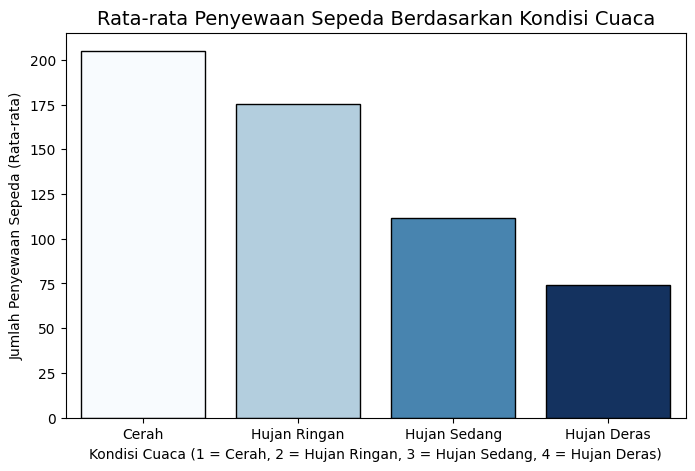

In [51]:
# menghitung rata-rata berdasarkan kondisi cuaca
weather_table = hour_df.groupby('weathersit')[['cnt']].mean()
clear_weather = weather_table.loc[1, 'cnt']
weather_table['penurunan_persen'] = ((clear_weather - weather_table['cnt']) / clear_weather) * 100
weather_table = weather_table.reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=weather_table, x='weathersit', y='cnt', hue='weathersit', palette="Blues", legend=False, edgecolor='black')

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Hujan Ringan, 3 = Hujan Sedang, 4 = Hujan Deras)")
plt.ylabel("Jumlah Penyewaan Sepeda (Rata-rata)")
plt.xticks([0, 1, 2, 3], ['Cerah', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Deras'])

plt.show()

## Pertanyaan 2

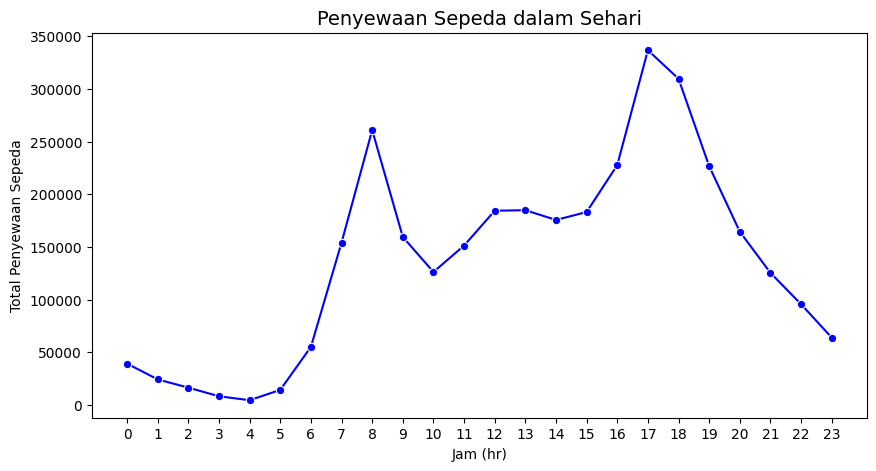

In [50]:
# mengurutkan jam berdasarkan penyewaan terbanyak
hourly_table = hour_df.groupby('hr')[['cnt']].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_table.index, y=hourly_table['cnt'], marker='o', linestyle='-', color='b')

plt.title("Penyewaan Sepeda dalam Sehari", fontsize=14)
plt.xlabel("Jam (hr)")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(range(0, 24))

plt.show()

### Insight Visualization & Explanatory Analysis
- Cuaca sangat mempengaruhi jumlah penyewaan sepeda karena Hujan deras mengurangi penyewaan hingga 63% dibandingkan cuaca cerah.
- Jam puncak penyewaan terjadi pada jam (hr) 17 dan 8

# Conclution

## Conclution pertanyaan 1
- Saat cuaca cerah (weathersit = 1), penyewaan sepeda lebih tinggi yaitu 204.
- Saat hujan ringan (weathersit = 2), penyewaan turun sekitar 175.
- Saat hujan sedang (weathersit = 3), penyewaan turun sekitar 111.
- Saat hujan deras (weathersit = 4), penyewaan turun sekitar 74.
- Kesimpulannya Cuaca buruk mengurangi jumlah penyewaan sepeda secara signifikan

## Conclution pertanyaan 2
- Penyewaan tertinggi terjadi pada jam (hr) 17 (sore)
- Jam sibuk lainnya adalah 8 (pagi)
- Pengguna terdaftar (registered) mendominasi penyewaan pada jam sibuk.
Kesimpulannya Puncak penyewaan sepeda terjadi pada jam 8 dan 17